<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_03 </span> </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

### Exercise 03.1

An European option is a contract between two parties in which one of the parties (the buyer, also known as *the holder*) has the right to purchase (**call option**)) from the other (the seller, also known as *the writer*) or to sell to him (**put option**) with a price $K$ at a prescribed expiry date T.  
Only *the writer* has an obligation, *the holder* will use his right only if he can gain a profit, i.e. the price $S(t)$ at the expiry time is $S(T)>K$, for a call option. In the other case, he can buy it for a cheaper price $S(T)<K $ on the market.  
The profit finally is:
$$\text{call option} \quad : \quad \text{profit}=\text{max}[0,S(T)-K] $$
$$\text{put option} \quad : \quad \text{profit}=\text{max}[0,K-S(T)] $$
  
The key is that *the writer* would not put him in a dangerous situation with the obligation without requiring a right compensation.  
To find this 'right' price, we can use the Black-Scholes-Merton equation, for a European call (**Vanilla plain**), in which *the holder* can use his right only at the expiry time T.  
This case is particular because we can compare our simulations with the analytic solution, reported below.

<p style="border:2px; border-style:solid; border-color:green; padding: 1em; background-color:azure">
Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.
Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time $t<T$:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$
where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$
where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$
</p>

We can see here the code to evalue the solution, with the parameters fixed in the first lines:

In [3]:
#ANALYTIC SOLUTION, taken from the exercise file 
from scipy.special import erf

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call:", round(call,5))
    print("put:  ", round(put,5))

 == BLACK-SCHOLES ==
call: 14.97579
put:   5.45953


We had to evalue the final asset price in two different ways:  

1) Computing directly the final price S(T), using $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right],$$ where $W(t)\sim\mathcal{N}(0,t)$.  

2) Evaluating the final price using a discretization of the time, using $$ S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)\Delta t +\sigma Z_{i+1}\sqrt{\Delta t}\right], $$ where $Z_i \sim \mathcal{N}(0,1)$.


For the parameters I choose the suggested values:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$


Considering the interest that a Bank would have guaranteed with a deposit at time $t =0$, we can obtain the profit adding a factor $\exp(-rT)$, and finally the call and put option prices are
$$ C[S(T),T]=e^{-rT}\max\left(0, S(T)-K\right) \\
P[S(T),T]=e^{-rT}\max\left(0, K-S(T)\right) $$

I simulated $M=10^5$ options and the calculated mean and uncertainties with the blocking method.  
In the discretized time simulation, I divided the interval of time in $100$ steps.

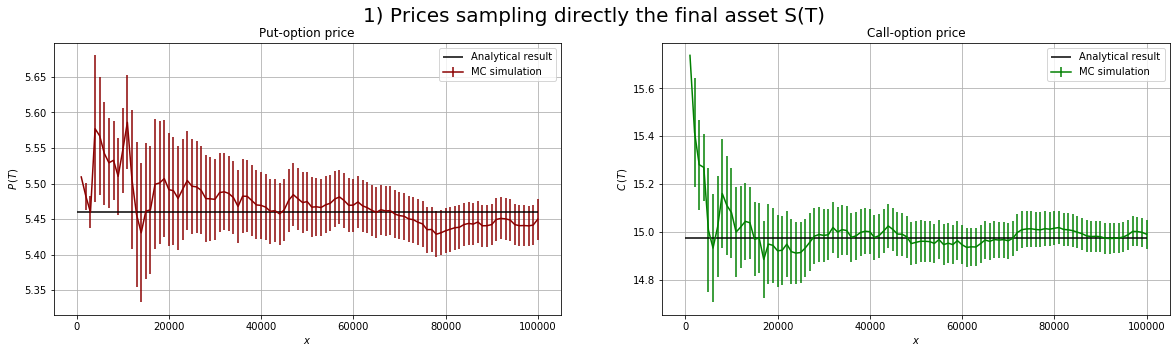

In [4]:
data_p= ascii.read('P1/Risultati/Put.dir', format='no_header')   #loading *put* data
data_c= ascii.read('P1/Risultati/Call.dir', format='no_header')   #loading *call* data
x = data_p['col1']   #number of throws*blocks is the same 
P = data_p['col2']   
err_P = data_p['col3']   #put uncertainties
C = data_c['col2']
err_C = data_c['col3']   #call uncertainties

plt.figure(figsize=(20,5))   #plotting results
plt.suptitle('1) Prices sampling directly the final asset S(T)', fontsize = 20)

plt.subplot(121)              #put option plot
plt.title('Put-option price')
plt.grid(True)
plt.errorbar(x, P, err_P, color='darkred', label='MC simulation')
plt.hlines(put, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$P \,(T)$')
plt.legend()

plt.subplot(122)
plt.title('Call-option price')
plt.grid(True)
plt.errorbar(x, C, err_C, color='green', label='MC simulation')
plt.hlines(call, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$C \, (T)$')
plt.legend()
plt.show()

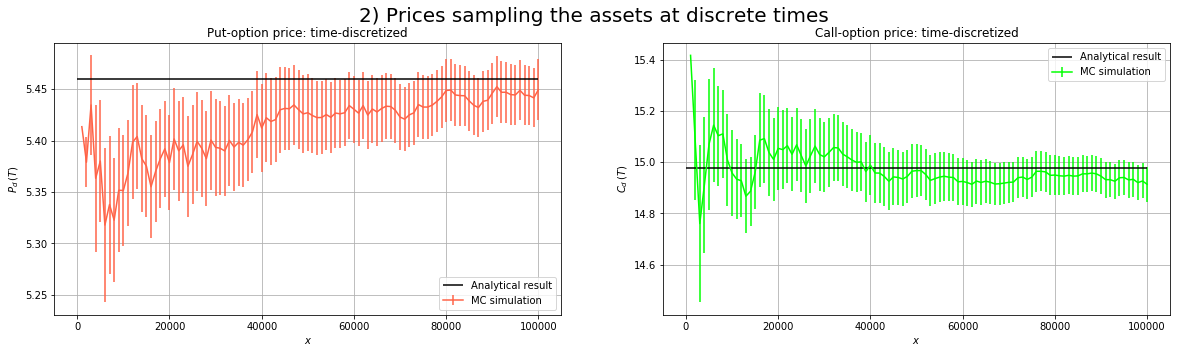

In [5]:
data_pt= ascii.read('P1/Risultati/Put.disc', format='no_header')   #loading *put* data
data_ct= ascii.read('P1/Risultati/Call.disc', format='no_header')   #loading *call* data
xt = data_pt['col1']   #number of throws*blocks is the same 
Pt = data_pt['col2']   
err_Pt = data_pt['col3']   #put uncertainties
Ct = data_ct['col2']
err_Ct = data_ct['col3']   #call uncertainties

plt.figure(figsize=(20,5))   #plotting results
plt.suptitle('2) Prices sampling the assets at discrete times', fontsize = 20)
plt.subplot(121)              #put option plot
plt.title('Put-option price: time-discretized')
plt.grid(True)
plt.errorbar(xt, Pt, err_Pt, color='tomato', label='MC simulation')
plt.hlines(put, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$P_d \, (T)$')
plt.legend(loc=4)

plt.subplot(122)
plt.title('Call-option price: time-discretized')
plt.grid(True)
plt.errorbar(xt, Ct, err_Ct, color='lime', label='MC simulation')
plt.hlines(call, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$C_d \,(T)$')
plt.legend()
plt.show()

The Monte-Carlo simulation in both of cases provides a result that is in concordance with the analytical results, represented with the black horizontal lines in the plots above.  

The direct method is better, but it is often not available and we have to perform the discretization of time.  
We can compare the results and the errors of the call and put option got with the two methods and the uncertainties:

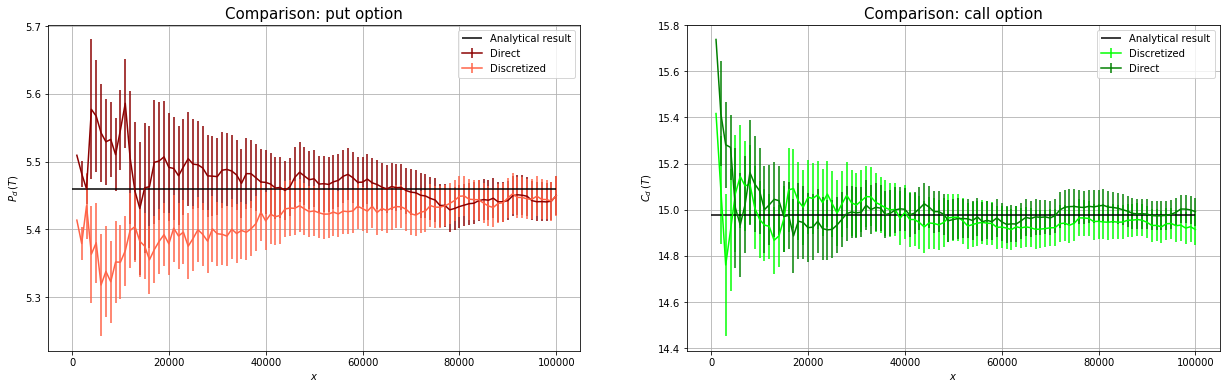

In [6]:
plt.figure(figsize=(21,6))   #comparations
plt.subplot(121)    
plt.title('Comparison: put option' , fontsize=15)
plt.grid(True)
plt.errorbar(x, P, err_P, color='darkred', label='Direct')
plt.errorbar(xt, Pt, err_Pt, color='tomato', label='Discretized')
plt.hlines(put, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$P_d \, (T)$')
plt.legend()

plt.subplot(122)
plt.title('Comparison: call option' , fontsize=15)
plt.grid(True)
plt.errorbar(xt, Ct, err_Ct, color='lime', label='Discretized')
plt.errorbar(x, C, err_C, color='green', label='Direct')
plt.hlines(call, 0, 1E5, label='Analytical result')   #value calculated analitically
plt.xlabel('$x$')
plt.ylabel('$C_d \,(T)$')
plt.legend()
plt.show()

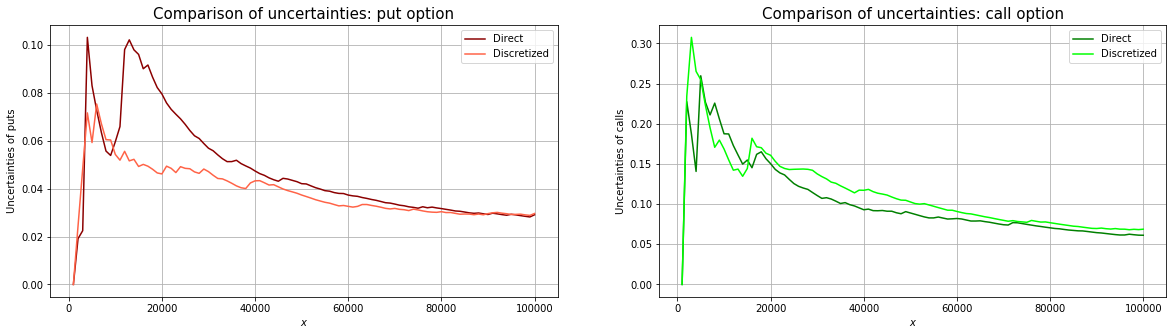

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('Comparison of uncertainties: put option' , fontsize=15)
plt.plot(x,err_P, label='Direct', color = 'darkred')
plt.plot(x,err_Pt, label='Discretized', color='tomato')
plt.xlabel('$x$')
plt.ylabel('Uncertainties of puts')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.title('Comparison of uncertainties: call option', fontsize=15)
plt.plot(x,err_C, label='Direct', color = 'green')
plt.plot(x,err_Ct, label='Discretized', color='lime')
plt.xlabel('$x$')
plt.ylabel('Uncertainties of calls')
plt.grid(True)
plt.legend()

plt.show()